<a href="https://colab.research.google.com/github/SHIVASAI16256/STML/blob/main/STML_A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
path = "/content/drive/MyDrive/SML AIML ASSIGNMENTS/SML ASSIGNMENTS/breast_cancer_survival.csv"
pd.read_csv(path)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

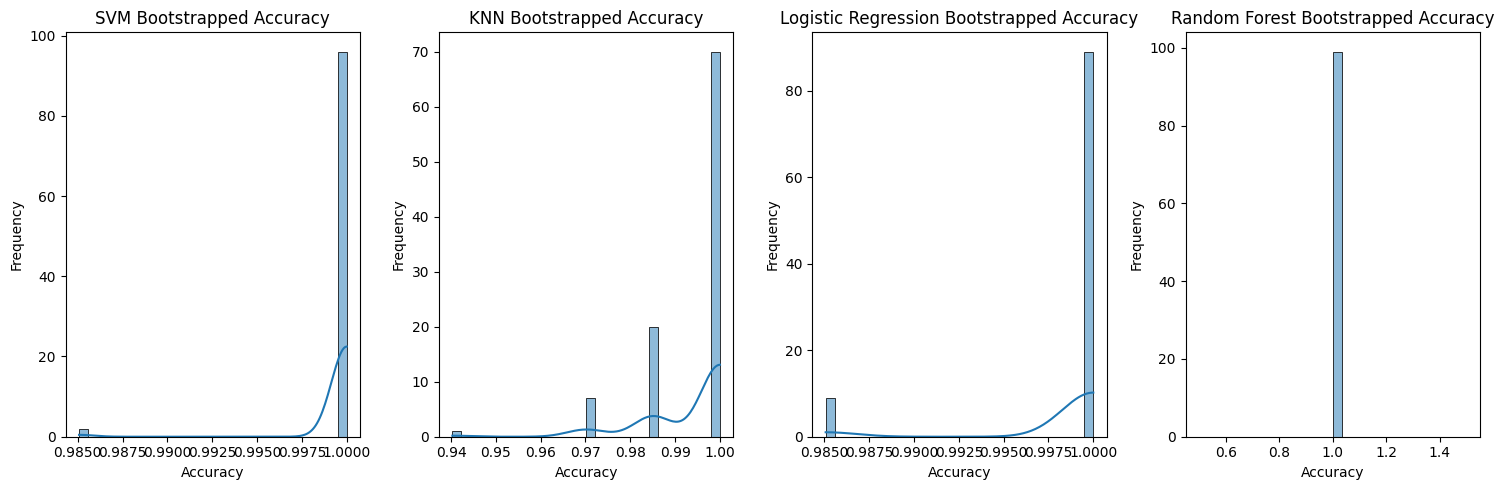

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import warnings


warnings.filterwarnings("ignore")


path = "/content/drive/MyDrive/SML AIML ASSIGNMENTS/SML ASSIGNMENTS/breast_cancer_survival.csv"
data = pd.read_csv(path)


print(data.head())
print("Columns in the dataset:", data.columns)


potential_target_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

if not potential_target_columns:
    potential_target_columns = data.select_dtypes(include=[np.number]).columns.tolist()

target_variable_name = None

for col in potential_target_columns:
    if data[col].nunique() <= 2:
        target_variable_name = col
        break

if target_variable_name is None:
    raise ValueError("No suitable binary target variable found in the dataset.")

print(f"Identified target variable: {target_variable_name}")

data = data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'], errors='ignore')

X = data.drop(columns=[target_variable_name])
y = data[target_variable_name]

X = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter tuning for SVM and KNN using GridSearchCV (optional)
svm_param_grid = {'C': [0.1, 1], 'gamma': ['scale', 'auto']}  # Reduced parameter options for speed
knn_param_grid = {'n_neighbors': [3, 5]}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=3)  # Reduced cv folds for speed
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3)

models['SVM'] = svm_grid_search
models['KNN'] = knn_grid_search

accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)


    cv_scores = cross_val_score(model, X_scaled, y, cv=3)
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

print("Model Accuracies:", accuracies)

def bootstrap_accuracy(model, X, y, n_iterations=100):
    bootstrapped_scores = []

    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y)

        if len(np.unique(y_resampled)) < 2:
            continue

        model.fit(X_resampled, y_resampled)
        score = model.score(X_test, y_test)
        bootstrapped_scores.append(score)

    return bootstrapped_scores

plt.figure(figsize=(15, 5))
for i, (model_name, model) in enumerate(models.items()):
    scores = bootstrap_accuracy(model, X_train, y_train, n_iterations=100)

    plt.subplot(1, len(models), i + 1)
    sns.histplot(scores, bins=30, kde=True)
    plt.title(f'{model_name} Bootstrapped Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()